In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

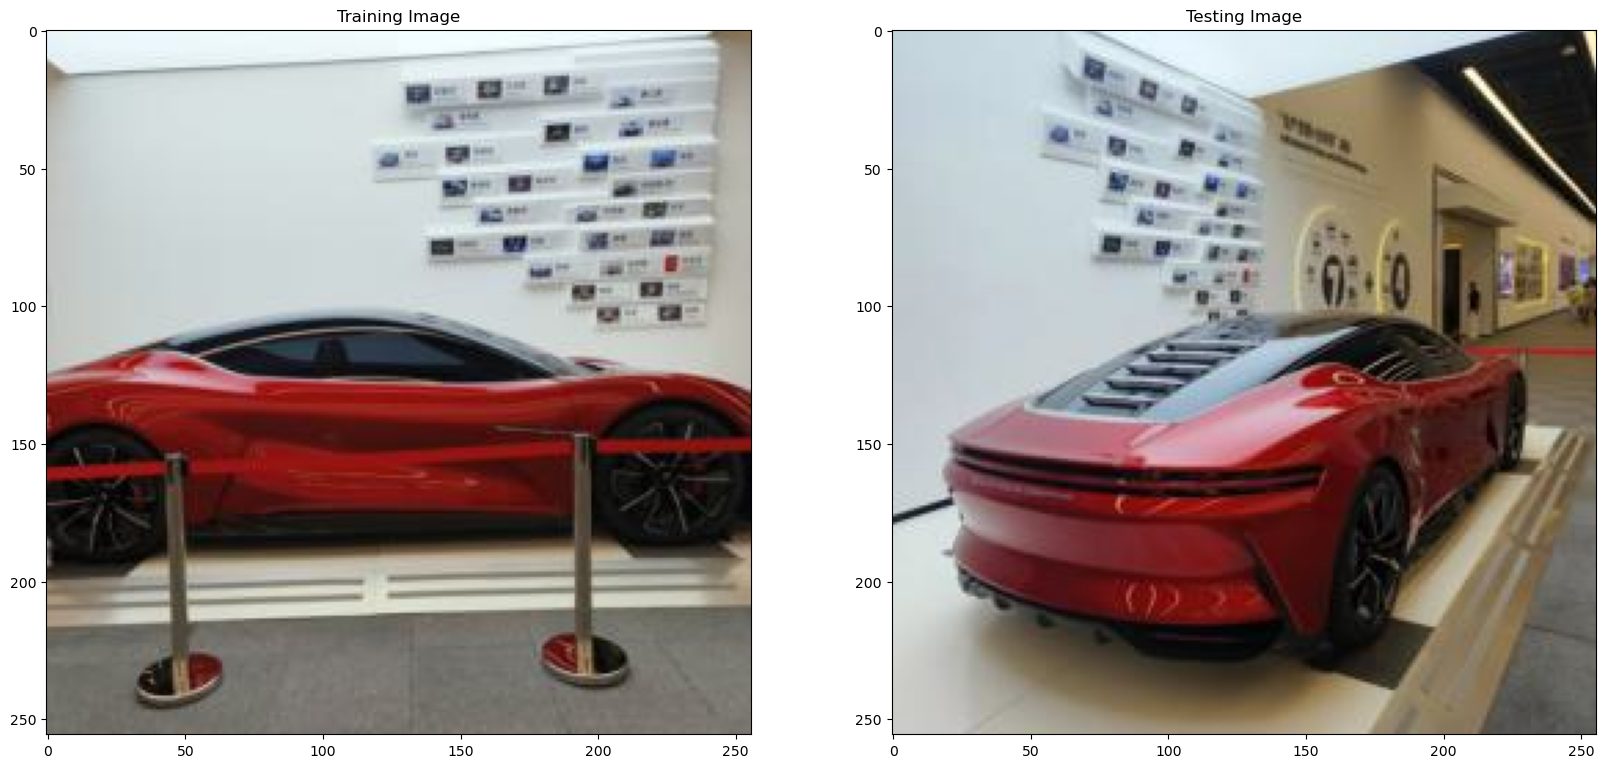

In [2]:
img = cv.imread('./dataset/img_256/05.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

test = cv.imread('./dataset/img_256/09.jpg', cv.IMREAD_COLOR)
test_rgb = cv.cvtColor(test, cv.COLOR_BGR2RGB)
test_gray = cv.cvtColor(test, cv.COLOR_BGR2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(img_rgb)

plots[1].set_title("Testing Image")
plots[1].imshow(test_rgb)

Number of Keypoints Detected In The Training Image:  271
Number of Keypoints Detected In The Query Image:  368


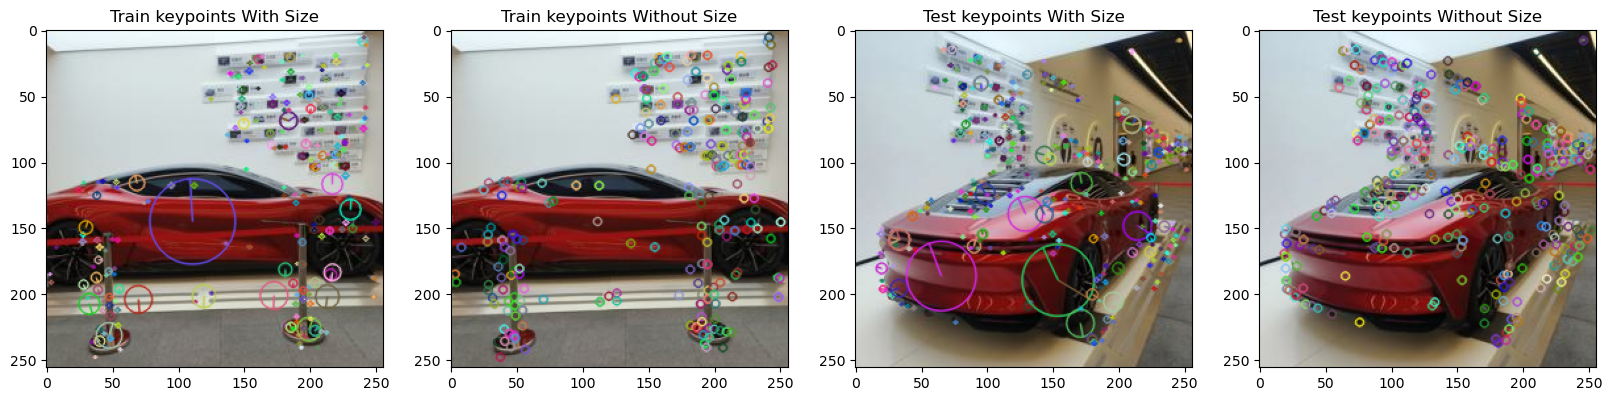

In [3]:
sift = cv.SIFT_create(edgeThreshold=10, contrastThreshold=0.04)
img_kp, img_desc = sift.detectAndCompute(img_gray, None)
test_kp, test_desc = sift.detectAndCompute(test_gray, None)

img_kp_size = np.copy(img)
img_kp_no_size = np.copy(img)

cv.drawKeypoints(img, img_kp, img_kp_size, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.drawKeypoints(img, img_kp, img_kp_no_size, flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)

test_kp_size = np.copy(test)
test_kp_no_size = np.copy(test)

cv.drawKeypoints(test, test_kp, test_kp_size, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.drawKeypoints(test, test_kp, test_kp_no_size, flags=cv.DRAW_MATCHES_FLAGS_DEFAULT)

fx, plots = plt.subplots(1, 4, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(cv.cvtColor(img_kp_size, cv.COLOR_BGR2RGB), cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(cv.cvtColor(img_kp_no_size, cv.COLOR_BGR2RGB), cmap='gray')

plots[2].set_title("Test keypoints With Size")
plots[2].imshow(cv.cvtColor(test_kp_size, cv.COLOR_BGR2RGB), cmap='gray')

plots[3].set_title("Test keypoints Without Size")
plots[3].imshow(cv.cvtColor(test_kp_no_size, cv.COLOR_BGR2RGB), cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(img_kp))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_kp))

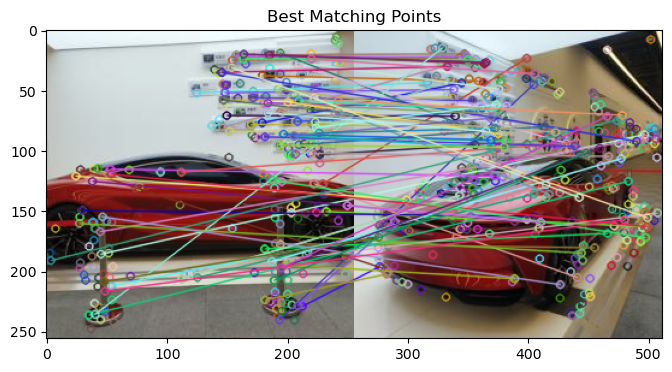


Number of Matching Keypoints Between The Training and Query Images:  89


In [4]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(img_desc, test_desc)
matches = sorted(matches, key=lambda x: x.distance)

result = cv.drawMatches(img, img_kp, test, test_kp, matches, test, flags=8)

plt.rcParams['figure.figsize'] = [8, 4.0]
plt.title('Best Matching Points')
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

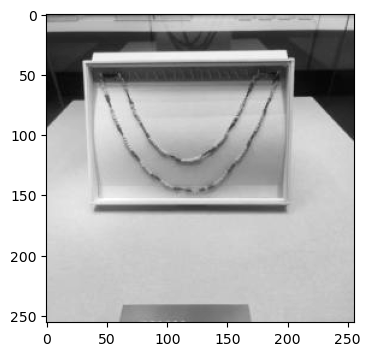

In [22]:
target = cv.imread('./dataset/img_256/10.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(target, cmap='gray')

In [20]:
def siftCompare(target_colour, test_colour, filter = True, show_img = True, contrastThreshold = 0.04, edgeThreshold = 10, colour = False):

    if colour:
        target = cv.cvtColor(target_colour, cv.COLOR_BGR2GRAY)
        test = cv.cvtColor(test_colour, cv.COLOR_BGR2GRAY)
    else:
        target = target_colour
        test = test_colour
    
    # Testing if it will work better with gaussian filters
    if(filter):
        target = cv.GaussianBlur(target, (5,5), 0)
        test = cv.GaussianBlur(test, (5,5), 0)

    sift = cv.SIFT_create(edgeThreshold=edgeThreshold, contrastThreshold=contrastThreshold)

    kp1, des1 = sift.detectAndCompute(target, None)
    kp2, des2 = sift.detectAndCompute(test, None)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # unique_matches = []
    # unique_query_index = set()

    # for match in good_matches:
    #     query_idx = match.queryIdx
    #     train_idx = match.trainIdx
    #     if train_idx not in unique_query_index:
    #         unique_matches.append(match)
    #         unique_query_index.add(query_idx)

    if colour:
        match_image = cv.drawMatches(target_colour, kp1, test_colour, kp2, good_matches, None, flags=2)
    else:
        match_image = cv.drawMatches(target, kp1, test, kp2, good_matches, None, flags=2)

    score = len(good_matches) / min(len(kp1), len(kp2)) * 100

    if(show_img):
        print(score)
        plt.imshow(cv.cvtColor(match_image, cv.COLOR_BGR2GRAY), cmap='gray')
        plt.show()

    return score, match_image


Comaring with 01.jpg ...
Score: 1.2987012987012987
Comaring with 02.jpg ...
Score: 1.2987012987012987
Comaring with 03.jpg ...
Score: 2.5974025974025974
Comaring with 04.jpg ...
Score: 0.0
Comaring with 05.jpg ...
Score: 1.2987012987012987
Comaring with 06.jpg ...
Score: 0.0
Comaring with 07.jpg ...
Score: 0.0
Comaring with 08.jpg ...
Score: 0.0
Comaring with 09.jpg ...
Score: 0.0
Comaring with 10.jpg ...
Score: 100.0


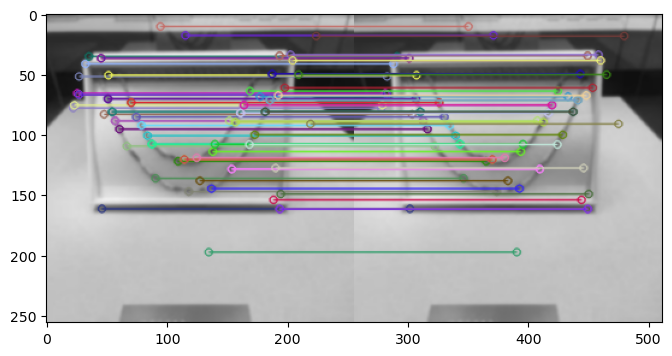

Comaring with 11.jpg ...
Score: 0.0
Comaring with 12.jpg ...
Score: 1.2987012987012987
Comaring with 13.jpg ...
Score: 11.688311688311687


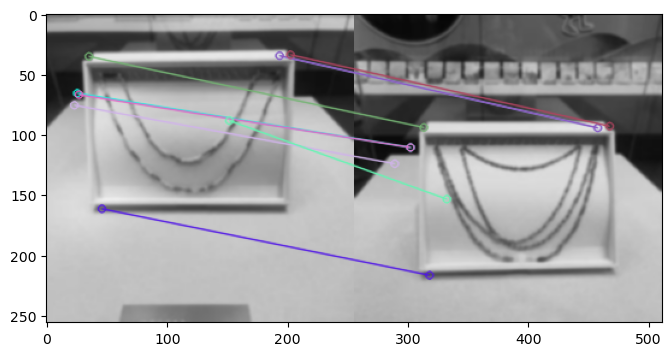

Comaring with 14.jpg ...
Score: 0.0
Comaring with 15.jpg ...
Score: 0.0
Comaring with 16.jpg ...
Score: 0.0
Comaring with 17.jpg ...
Score: 2.5974025974025974
Comaring with 18.jpg ...
Score: 2.5974025974025974
Comaring with 19.jpg ...
Score: 5.194805194805195
Comaring with 20.jpg ...
Score: 1.2987012987012987


In [23]:
filenames = os.listdir("./dataset/img_256")
filenames.sort()

for file in filenames:
    print("=======")
    print("Comaring with " + file + " ...")

    test = cv.imread('./dataset/img_256/' + file, cv.IMREAD_GRAYSCALE)
    score, out_img = siftCompare(target, test, show_img = False)

    print("Score: " + str(score))

    if score > 10:
        plt.imshow(out_img, cmap='gray')
        plt.show()


Comaring with 01.jpg with 02.jpg ...
Comaring with 01.jpg with 03.jpg ...
Comaring with 01.jpg with 04.jpg ...
Comaring with 01.jpg with 05.jpg ...
Comaring with 01.jpg with 06.jpg ...
Comaring with 01.jpg with 07.jpg ...
Comaring with 01.jpg with 08.jpg ...
Comaring with 01.jpg with 09.jpg ...
Comaring with 01.jpg with 10.jpg ...
10.38961038961039


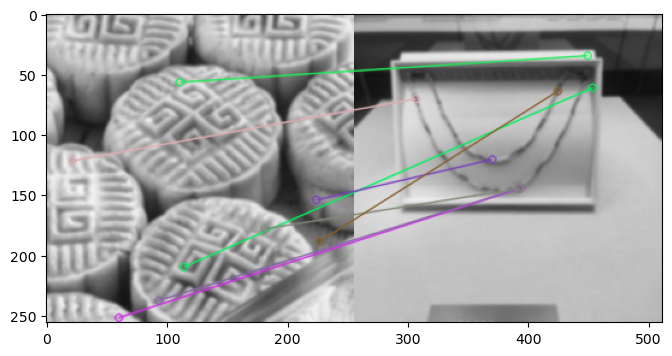

Comaring with 01.jpg with 11.jpg ...
Comaring with 01.jpg with 12.jpg ...
Comaring with 01.jpg with 13.jpg ...
Comaring with 01.jpg with 14.jpg ...
Comaring with 01.jpg with 15.jpg ...
Comaring with 01.jpg with 16.jpg ...
Comaring with 01.jpg with 17.jpg ...
Comaring with 01.jpg with 18.jpg ...
Comaring with 01.jpg with 19.jpg ...
Comaring with 01.jpg with 20.jpg ...
Comaring with 02.jpg with 01.jpg ...
Comaring with 02.jpg with 03.jpg ...
Comaring with 02.jpg with 04.jpg ...
Comaring with 02.jpg with 05.jpg ...
Comaring with 02.jpg with 06.jpg ...
Comaring with 02.jpg with 07.jpg ...
Comaring with 02.jpg with 08.jpg ...
75.09433962264151


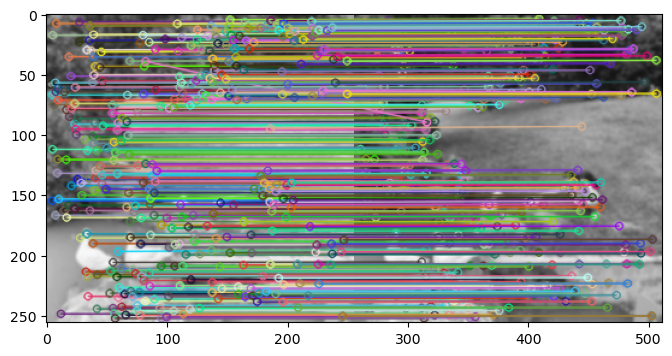

Comaring with 02.jpg with 09.jpg ...
Comaring with 02.jpg with 10.jpg ...
Comaring with 02.jpg with 11.jpg ...
Comaring with 02.jpg with 12.jpg ...
Comaring with 02.jpg with 13.jpg ...
Comaring with 02.jpg with 14.jpg ...
Comaring with 02.jpg with 15.jpg ...
Comaring with 02.jpg with 16.jpg ...
Comaring with 02.jpg with 17.jpg ...
Comaring with 02.jpg with 18.jpg ...
Comaring with 02.jpg with 19.jpg ...
Comaring with 02.jpg with 20.jpg ...
70.89678510998309


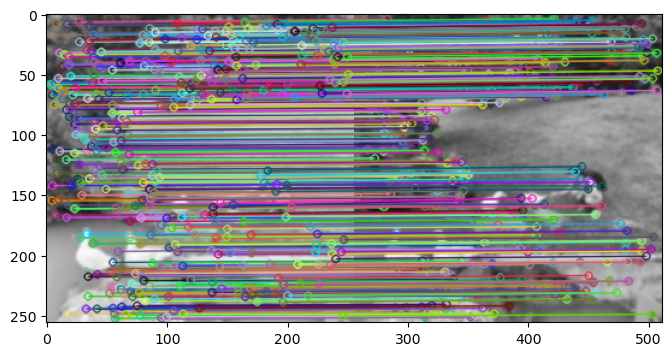

Comaring with 03.jpg with 01.jpg ...
Comaring with 03.jpg with 02.jpg ...
Comaring with 03.jpg with 04.jpg ...
Comaring with 03.jpg with 05.jpg ...
Comaring with 03.jpg with 06.jpg ...
Comaring with 03.jpg with 07.jpg ...
Comaring with 03.jpg with 08.jpg ...
Comaring with 03.jpg with 09.jpg ...
Comaring with 03.jpg with 10.jpg ...
11.688311688311687


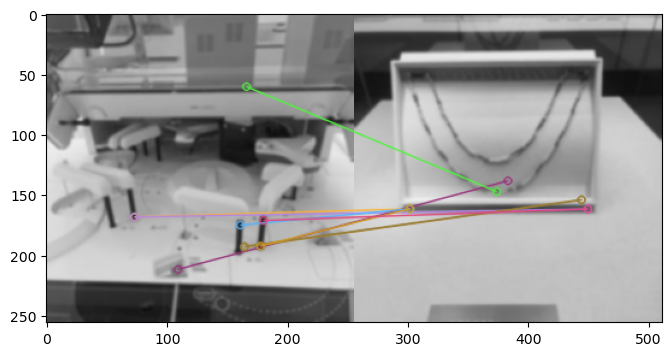

Comaring with 03.jpg with 11.jpg ...
Comaring with 03.jpg with 12.jpg ...
Comaring with 03.jpg with 13.jpg ...
Comaring with 03.jpg with 14.jpg ...
Comaring with 03.jpg with 15.jpg ...
Comaring with 03.jpg with 16.jpg ...
Comaring with 03.jpg with 17.jpg ...
Comaring with 03.jpg with 18.jpg ...
Comaring with 03.jpg with 19.jpg ...
Comaring with 03.jpg with 20.jpg ...
Comaring with 04.jpg with 01.jpg ...
Comaring with 04.jpg with 02.jpg ...
Comaring with 04.jpg with 03.jpg ...
Comaring with 04.jpg with 05.jpg ...
Comaring with 04.jpg with 06.jpg ...
Comaring with 04.jpg with 07.jpg ...
Comaring with 04.jpg with 08.jpg ...
Comaring with 04.jpg with 09.jpg ...
Comaring with 04.jpg with 10.jpg ...
Comaring with 04.jpg with 11.jpg ...
81.21546961325967


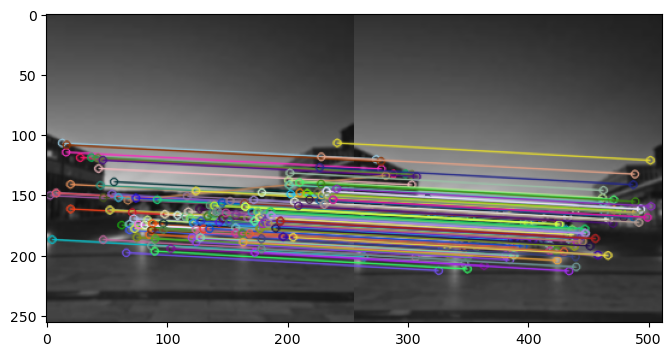

Comaring with 04.jpg with 12.jpg ...
Comaring with 04.jpg with 13.jpg ...
Comaring with 04.jpg with 14.jpg ...
Comaring with 04.jpg with 15.jpg ...
100.0


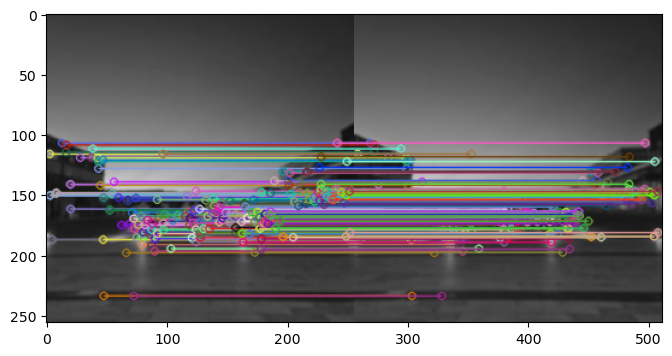

Comaring with 04.jpg with 16.jpg ...
Comaring with 04.jpg with 17.jpg ...
Comaring with 04.jpg with 18.jpg ...
Comaring with 04.jpg with 19.jpg ...
Comaring with 04.jpg with 20.jpg ...
Comaring with 05.jpg with 01.jpg ...
Comaring with 05.jpg with 02.jpg ...
Comaring with 05.jpg with 03.jpg ...
Comaring with 05.jpg with 04.jpg ...
Comaring with 05.jpg with 06.jpg ...
Comaring with 05.jpg with 07.jpg ...
Comaring with 05.jpg with 08.jpg ...
Comaring with 05.jpg with 09.jpg ...
11.052631578947368


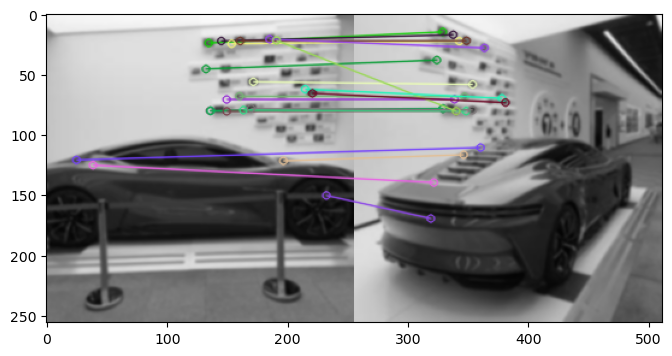

Comaring with 05.jpg with 10.jpg ...
Comaring with 05.jpg with 11.jpg ...
Comaring with 05.jpg with 12.jpg ...
14.37125748502994


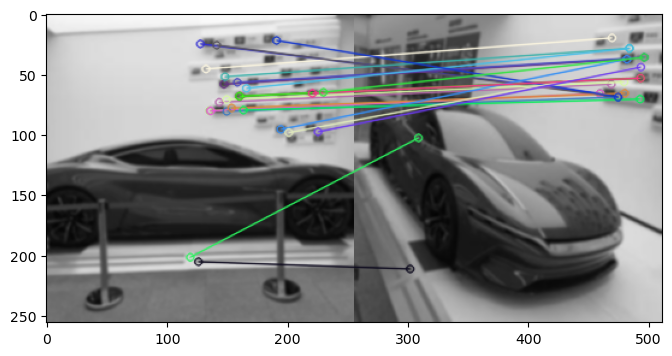

Comaring with 05.jpg with 13.jpg ...
Comaring with 05.jpg with 14.jpg ...
Comaring with 05.jpg with 15.jpg ...
Comaring with 05.jpg with 16.jpg ...
Comaring with 05.jpg with 17.jpg ...
Comaring with 05.jpg with 18.jpg ...
Comaring with 05.jpg with 19.jpg ...
Comaring with 05.jpg with 20.jpg ...
Comaring with 06.jpg with 01.jpg ...
Comaring with 06.jpg with 02.jpg ...
Comaring with 06.jpg with 03.jpg ...
Comaring with 06.jpg with 04.jpg ...
Comaring with 06.jpg with 05.jpg ...
Comaring with 06.jpg with 07.jpg ...
Comaring with 06.jpg with 08.jpg ...
Comaring with 06.jpg with 09.jpg ...
Comaring with 06.jpg with 10.jpg ...
Comaring with 06.jpg with 11.jpg ...
Comaring with 06.jpg with 12.jpg ...
Comaring with 06.jpg with 13.jpg ...
Comaring with 06.jpg with 14.jpg ...
Comaring with 06.jpg with 15.jpg ...
Comaring with 06.jpg with 16.jpg ...
Comaring with 06.jpg with 17.jpg ...
Comaring with 06.jpg with 18.jpg ...
Comaring with 06.jpg with 19.jpg ...
Comaring with 06.jpg with 20.jpg ...
C

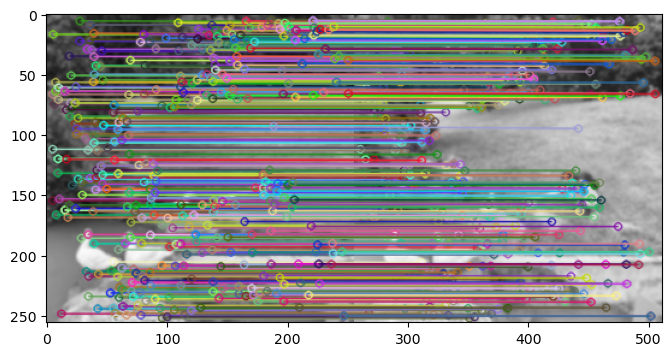

Comaring with 08.jpg with 03.jpg ...
Comaring with 08.jpg with 04.jpg ...
Comaring with 08.jpg with 05.jpg ...
Comaring with 08.jpg with 06.jpg ...
Comaring with 08.jpg with 07.jpg ...
Comaring with 08.jpg with 09.jpg ...
Comaring with 08.jpg with 10.jpg ...
Comaring with 08.jpg with 11.jpg ...
Comaring with 08.jpg with 12.jpg ...
Comaring with 08.jpg with 13.jpg ...
Comaring with 08.jpg with 14.jpg ...
Comaring with 08.jpg with 15.jpg ...
Comaring with 08.jpg with 16.jpg ...
Comaring with 08.jpg with 17.jpg ...
Comaring with 08.jpg with 18.jpg ...
Comaring with 08.jpg with 19.jpg ...
Comaring with 08.jpg with 20.jpg ...
74.52830188679245


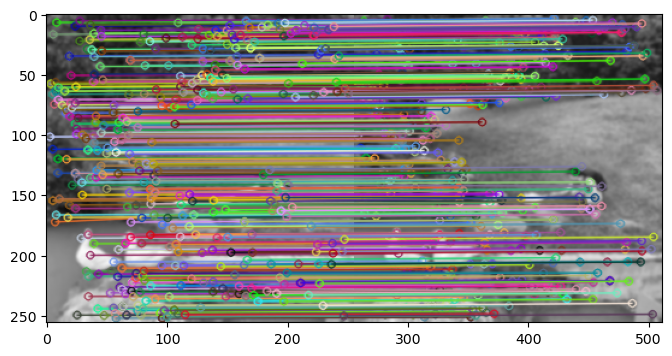

Comaring with 09.jpg with 01.jpg ...
Comaring with 09.jpg with 02.jpg ...
Comaring with 09.jpg with 03.jpg ...
Comaring with 09.jpg with 04.jpg ...
Comaring with 09.jpg with 05.jpg ...
Comaring with 09.jpg with 06.jpg ...
Comaring with 09.jpg with 07.jpg ...
Comaring with 09.jpg with 08.jpg ...
Comaring with 09.jpg with 10.jpg ...
Comaring with 09.jpg with 11.jpg ...
Comaring with 09.jpg with 12.jpg ...
Comaring with 09.jpg with 13.jpg ...
Comaring with 09.jpg with 14.jpg ...
Comaring with 09.jpg with 15.jpg ...
Comaring with 09.jpg with 16.jpg ...
Comaring with 09.jpg with 17.jpg ...
Comaring with 09.jpg with 18.jpg ...
Comaring with 09.jpg with 19.jpg ...
Comaring with 09.jpg with 20.jpg ...
Comaring with 10.jpg with 01.jpg ...
Comaring with 10.jpg with 02.jpg ...
Comaring with 10.jpg with 03.jpg ...
Comaring with 10.jpg with 04.jpg ...
Comaring with 10.jpg with 05.jpg ...
Comaring with 10.jpg with 06.jpg ...
Comaring with 10.jpg with 07.jpg ...
Comaring with 10.jpg with 08.jpg ...
C

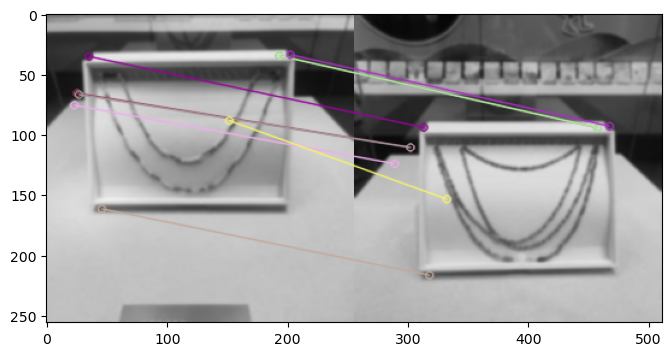

Comaring with 10.jpg with 14.jpg ...
Comaring with 10.jpg with 15.jpg ...
Comaring with 10.jpg with 16.jpg ...
Comaring with 10.jpg with 17.jpg ...
Comaring with 10.jpg with 18.jpg ...
Comaring with 10.jpg with 19.jpg ...
Comaring with 10.jpg with 20.jpg ...
Comaring with 11.jpg with 01.jpg ...
Comaring with 11.jpg with 02.jpg ...
Comaring with 11.jpg with 03.jpg ...
Comaring with 11.jpg with 04.jpg ...
81.76795580110497


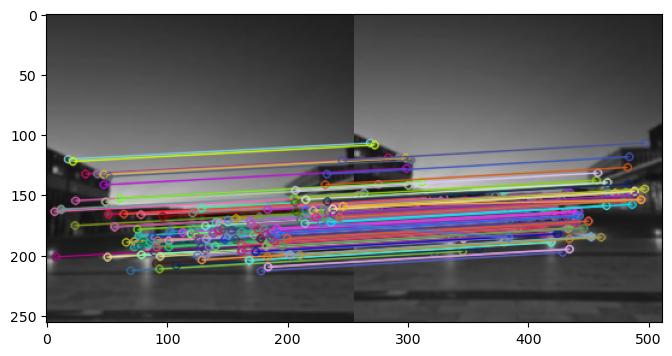

Comaring with 11.jpg with 05.jpg ...
Comaring with 11.jpg with 06.jpg ...
Comaring with 11.jpg with 07.jpg ...
Comaring with 11.jpg with 08.jpg ...
Comaring with 11.jpg with 09.jpg ...
Comaring with 11.jpg with 10.jpg ...
Comaring with 11.jpg with 12.jpg ...
Comaring with 11.jpg with 13.jpg ...
Comaring with 11.jpg with 14.jpg ...
Comaring with 11.jpg with 15.jpg ...
81.76795580110497


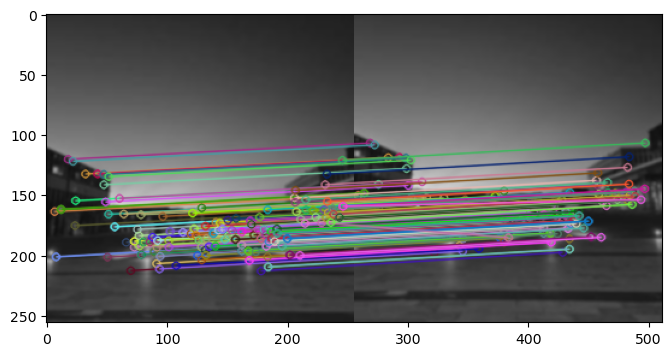

Comaring with 11.jpg with 16.jpg ...
Comaring with 11.jpg with 17.jpg ...
Comaring with 11.jpg with 18.jpg ...
Comaring with 11.jpg with 19.jpg ...
Comaring with 11.jpg with 20.jpg ...
Comaring with 12.jpg with 01.jpg ...
Comaring with 12.jpg with 02.jpg ...
Comaring with 12.jpg with 03.jpg ...
Comaring with 12.jpg with 04.jpg ...
Comaring with 12.jpg with 05.jpg ...
Comaring with 12.jpg with 06.jpg ...
Comaring with 12.jpg with 07.jpg ...
Comaring with 12.jpg with 08.jpg ...
Comaring with 12.jpg with 09.jpg ...
Comaring with 12.jpg with 10.jpg ...
Comaring with 12.jpg with 11.jpg ...
Comaring with 12.jpg with 13.jpg ...
Comaring with 12.jpg with 14.jpg ...
Comaring with 12.jpg with 15.jpg ...
Comaring with 12.jpg with 16.jpg ...
Comaring with 12.jpg with 17.jpg ...
Comaring with 12.jpg with 18.jpg ...
Comaring with 12.jpg with 19.jpg ...
Comaring with 12.jpg with 20.jpg ...
Comaring with 13.jpg with 01.jpg ...
Comaring with 13.jpg with 02.jpg ...
Comaring with 13.jpg with 03.jpg ...
C

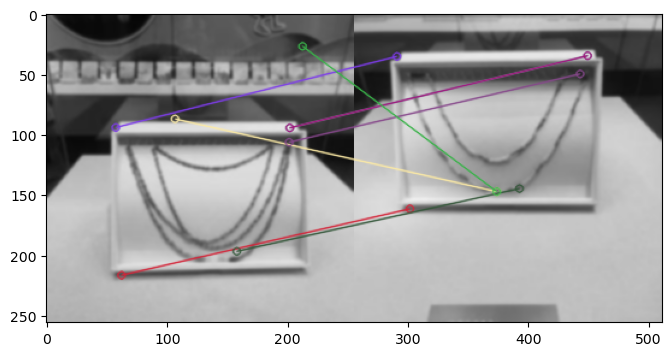

Comaring with 13.jpg with 11.jpg ...
Comaring with 13.jpg with 12.jpg ...
Comaring with 13.jpg with 14.jpg ...
Comaring with 13.jpg with 15.jpg ...
Comaring with 13.jpg with 16.jpg ...
Comaring with 13.jpg with 17.jpg ...
Comaring with 13.jpg with 18.jpg ...
Comaring with 13.jpg with 19.jpg ...
Comaring with 13.jpg with 20.jpg ...
Comaring with 14.jpg with 01.jpg ...
Comaring with 14.jpg with 02.jpg ...
Comaring with 14.jpg with 03.jpg ...
Comaring with 14.jpg with 04.jpg ...
Comaring with 14.jpg with 05.jpg ...
Comaring with 14.jpg with 06.jpg ...
Comaring with 14.jpg with 07.jpg ...
Comaring with 14.jpg with 08.jpg ...
Comaring with 14.jpg with 09.jpg ...
Comaring with 14.jpg with 10.jpg ...
Comaring with 14.jpg with 11.jpg ...
Comaring with 14.jpg with 12.jpg ...
Comaring with 14.jpg with 13.jpg ...
Comaring with 14.jpg with 15.jpg ...
Comaring with 14.jpg with 16.jpg ...
Comaring with 14.jpg with 17.jpg ...
Comaring with 14.jpg with 18.jpg ...
Comaring with 14.jpg with 19.jpg ...
C

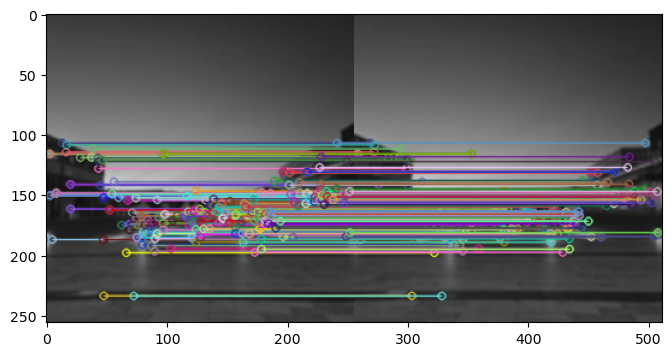

Comaring with 15.jpg with 05.jpg ...
Comaring with 15.jpg with 06.jpg ...
Comaring with 15.jpg with 07.jpg ...
Comaring with 15.jpg with 08.jpg ...
Comaring with 15.jpg with 09.jpg ...
Comaring with 15.jpg with 10.jpg ...
Comaring with 15.jpg with 11.jpg ...
81.21546961325967


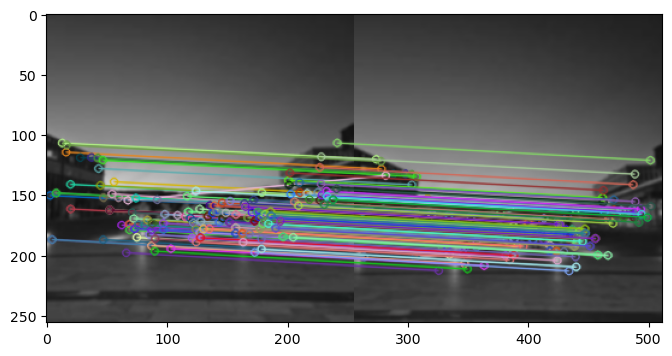

Comaring with 15.jpg with 12.jpg ...
Comaring with 15.jpg with 13.jpg ...
Comaring with 15.jpg with 14.jpg ...
Comaring with 15.jpg with 16.jpg ...
Comaring with 15.jpg with 17.jpg ...
Comaring with 15.jpg with 18.jpg ...
Comaring with 15.jpg with 19.jpg ...
Comaring with 15.jpg with 20.jpg ...
Comaring with 16.jpg with 01.jpg ...
Comaring with 16.jpg with 02.jpg ...
Comaring with 16.jpg with 03.jpg ...
Comaring with 16.jpg with 04.jpg ...
Comaring with 16.jpg with 05.jpg ...
Comaring with 16.jpg with 06.jpg ...
Comaring with 16.jpg with 07.jpg ...
Comaring with 16.jpg with 08.jpg ...
Comaring with 16.jpg with 09.jpg ...
Comaring with 16.jpg with 10.jpg ...
Comaring with 16.jpg with 11.jpg ...
Comaring with 16.jpg with 12.jpg ...
Comaring with 16.jpg with 13.jpg ...
Comaring with 16.jpg with 14.jpg ...
Comaring with 16.jpg with 15.jpg ...
Comaring with 16.jpg with 17.jpg ...
Comaring with 16.jpg with 18.jpg ...
Comaring with 16.jpg with 19.jpg ...
Comaring with 16.jpg with 20.jpg ...
C

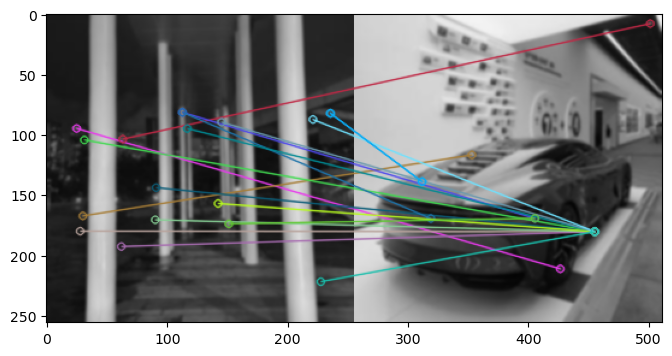

Comaring with 19.jpg with 10.jpg ...
15.584415584415584


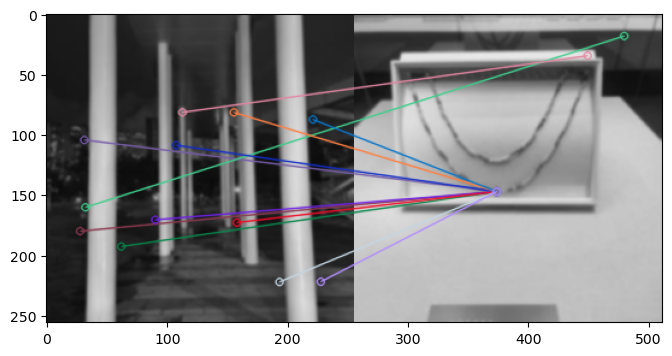

Comaring with 19.jpg with 11.jpg ...
Comaring with 19.jpg with 12.jpg ...
Comaring with 19.jpg with 13.jpg ...
Comaring with 19.jpg with 14.jpg ...
Comaring with 19.jpg with 15.jpg ...
Comaring with 19.jpg with 16.jpg ...
Comaring with 19.jpg with 17.jpg ...
Comaring with 19.jpg with 18.jpg ...
Comaring with 19.jpg with 20.jpg ...
Comaring with 20.jpg with 01.jpg ...
Comaring with 20.jpg with 02.jpg ...
71.2351945854484


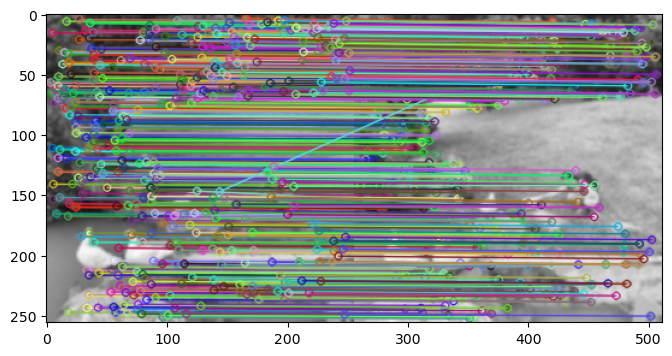

Comaring with 20.jpg with 03.jpg ...
Comaring with 20.jpg with 04.jpg ...
Comaring with 20.jpg with 05.jpg ...
Comaring with 20.jpg with 06.jpg ...
Comaring with 20.jpg with 07.jpg ...
Comaring with 20.jpg with 08.jpg ...
75.84905660377359


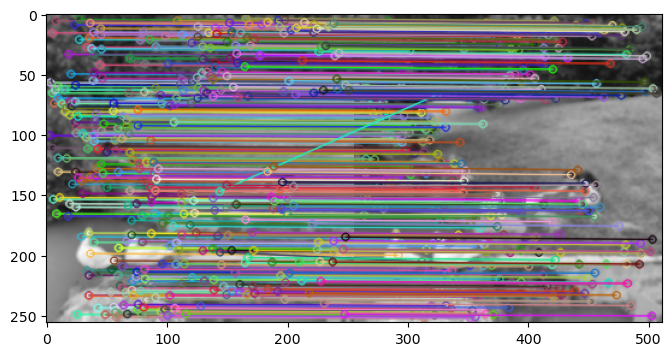

Comaring with 20.jpg with 09.jpg ...
Comaring with 20.jpg with 10.jpg ...
Comaring with 20.jpg with 11.jpg ...
Comaring with 20.jpg with 12.jpg ...
Comaring with 20.jpg with 13.jpg ...
Comaring with 20.jpg with 14.jpg ...
Comaring with 20.jpg with 15.jpg ...
Comaring with 20.jpg with 16.jpg ...
Comaring with 20.jpg with 17.jpg ...
Comaring with 20.jpg with 18.jpg ...
Comaring with 20.jpg with 19.jpg ...


In [ ]:
scores = []

for file1 in filenames:
    target = cv.imread('./dataset/img_256/' + file1, cv.IMREAD_COLOR)
    target_gray = cv.cvtColor(target, cv.COLOR_BGR2GRAY)
    for file2 in filenames:
        if file1 == file2:
            continue
        
        test = cv.imread('./dataset/img_256/' + file2, cv.IMREAD_COLOR)
        test_gray = cv.cvtColor(test, cv.COLOR_BGR2GRAY)
        print("=======")
        print("Comaring with " + file1 + " with " + file2 + " ...")

        score, out_img = siftcompare(target_gray, test_gray, show_img=False, contrastThreshold=0.04, edgeThreshold=10)
        scores.append(score)

        if score > 10:
            print(score)
            plt.imshow(out_img, cmap='gray')
            plt.show()



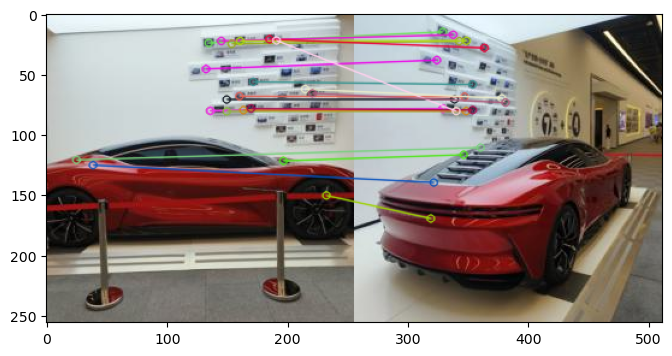

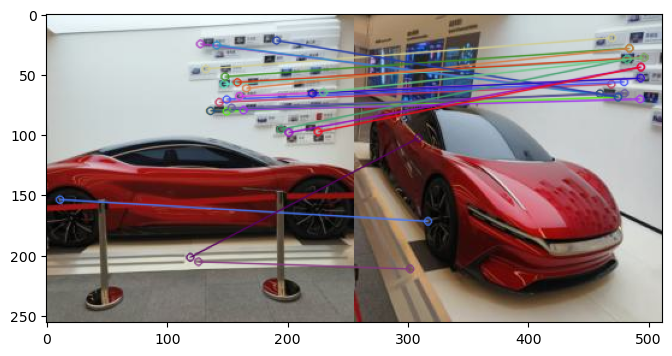

In [10]:
# Compare image 05 09 and 12 with our SIFT comparison function

target = cv.imread('./dataset/img_256/05.jpg')
test = cv.imread('./dataset/img_256/09.jpg')
score, out_img = siftCompare(target, test, show_img=False, colour=True)

plt.imshow(cv.cvtColor(out_img, cv.COLOR_BGR2RGB), cmap='gray')
plt.show()

test = cv.imread('./dataset/img_256/12.jpg')
score, out_img = siftCompare(target, test, show_img=False, colour=True)

plt.imshow(cv.cvtColor(out_img, cv.COLOR_BGR2RGB), cmap='gray')
plt.show()

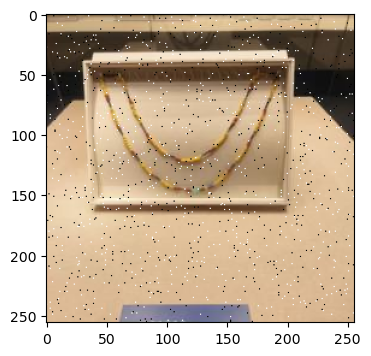

In [15]:
image = cv.imread('./dataset/img_256/10.jpg')
noise_prob = 0.01 
noisy_image = np.copy(image)
mask = np.random.random(image.shape[:2])
noisy_image[mask < noise_prob] = 0 
noisy_image[mask > 1 - noise_prob] = 255
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB), cmap='gray')
plt.show()


0.5263157894736842


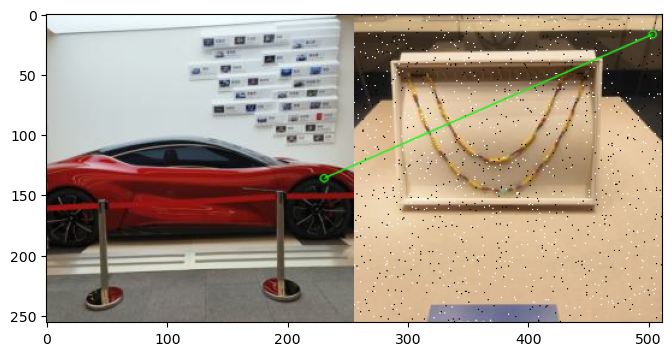

In [18]:
score, out_img = siftCompare(target, noisy_image, show_img=True, colour = True)